# 现代数字信号处理及其应用

1. 请按照以下条件，利用仿真软件获得教材 4.2.5 节计算实例 1 中信号模型对应的误差性能面图。使用$𝑀 = 2$抽头的维纳滤波器。  
    1. $𝑁 = 4, \sigma_v^2 = 0.5$。(重现图 4.2.3(b))  
    2. $𝑁 = 4，\sigma_v^2 = 2$，并计算最优权向量$\omega_0$和最小均方误差$J_{min}$。  
    3. $𝑁 = 16，\sigma_v^2 = 0.5$，并计算最优权向量$\omega_0$和最小均方误差$J_{min}$  
    4. 在题 C条件下，采用最陡下降算法，完成$𝑀 = 2$抽头的维纳滤波器迭代估计。 择适当的步长参数$\mu$，并说明该步长是否能保证算法收敛。请给出学习曲线。

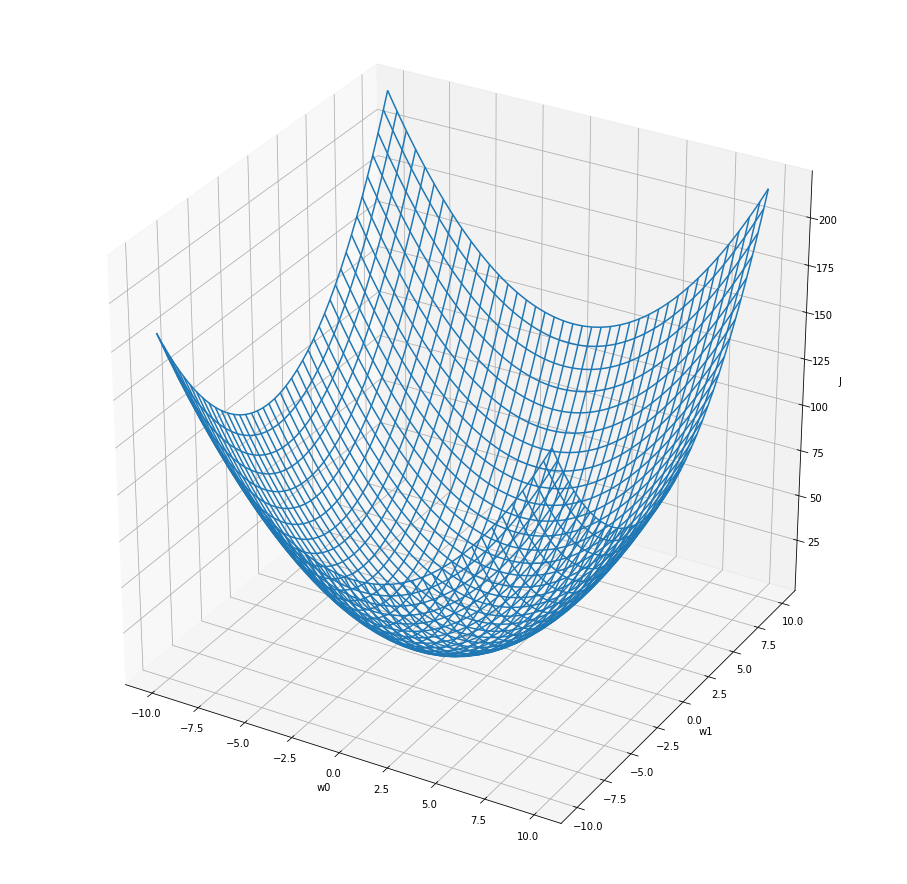

(array([[ 3.061617e-17],
       [-1.000000e+00]]), array([[1.]]))


In [6]:
%matplotlib inline
import numpy as np

from numpy.linalg import inv
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

def Error_computing(N=4, sigma_v_square=0.5, is_plot=True):

#     N = 4
#     sigma_d = np.sqrt(2)
#     sigma_v = np.sqrt(0.5)

    p = np.array([0, - np.sin(2*np.pi/N)]).reshape(-1, 1)
    R = np.array([
        [1/2+sigma_v_square, 1/2 * np.cos(2*np.pi/N)], 
        [1/2 * np.cos(2*np.pi/N), 1/2 + sigma_v_square]
    ])


    # 画图
    if is_plot is True:
        
        w_0 = np.arange(-10, 10, 0.1)
        w_1 = np.arange(-10, 10, 0.1)
        _w_0, _w_1 = np.meshgrid(w_0, w_1)

        w = np.stack([_w_0, _w_1], axis=0)

        J = np.zeros_like(_w_0)

        for i in range(len(w_0)):
            for j in range(len(w_1)):
                w_ = w[:,i,j].reshape(-1, 1)
                J[i, j] = 2 - 2*p.T.dot(w_) + w_.T.dot(R).dot(w_)

        fig = plt.figure(figsize=[16, 16])
        ax = fig.add_subplot(111, projection='3d')

        ax.plot_wireframe(_w_0, _w_1, J, rstride=5, cstride=5, alpha=1)

        ax.set_xlabel('w0')
        ax.set_ylabel('w1')
        ax.set_zlabel('J')

        plt.show()
        
        
    Omega_star = inv(R).dot(p)
    J_Min = 2 - p.T.dot(Omega_star)
    
    return (Omega_star, J_Min)


print(Error_computing())


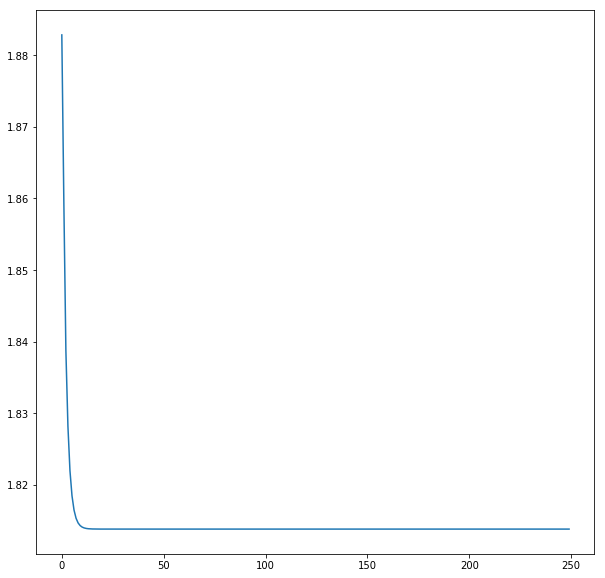

In [47]:
%matplotlib inline
import numpy as np

from numpy.linalg import inv, eig
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


Iteration_number=250

N=16
sigma_v_square = 0.5

mu = 0.8


p = np.asmatrix([0, - np.sin(2*np.pi/N)]).reshape(-1, 1)
R = np.asmatrix([
    [1/2+sigma_v_square, 1/2 * np.cos(2*np.pi/N)],
    [1/2 * np.cos(2*np.pi/N), 1/2 + sigma_v_square]
])

# w,v = eig(R)

# eig_max_index = w.argmax()

# lambda_max = w[eig_max_index]


w = np.array([0,0]).reshape(-1, 1)
J = []
for n in range(Iteration_number):
    w = w + mu*(p-R.dot(w))
    J_n = 2 - p.H.dot(w)
    J.append(J_n.item())

    
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
# print(J)
ax.plot(np.array(J))


(2, 1, 512)


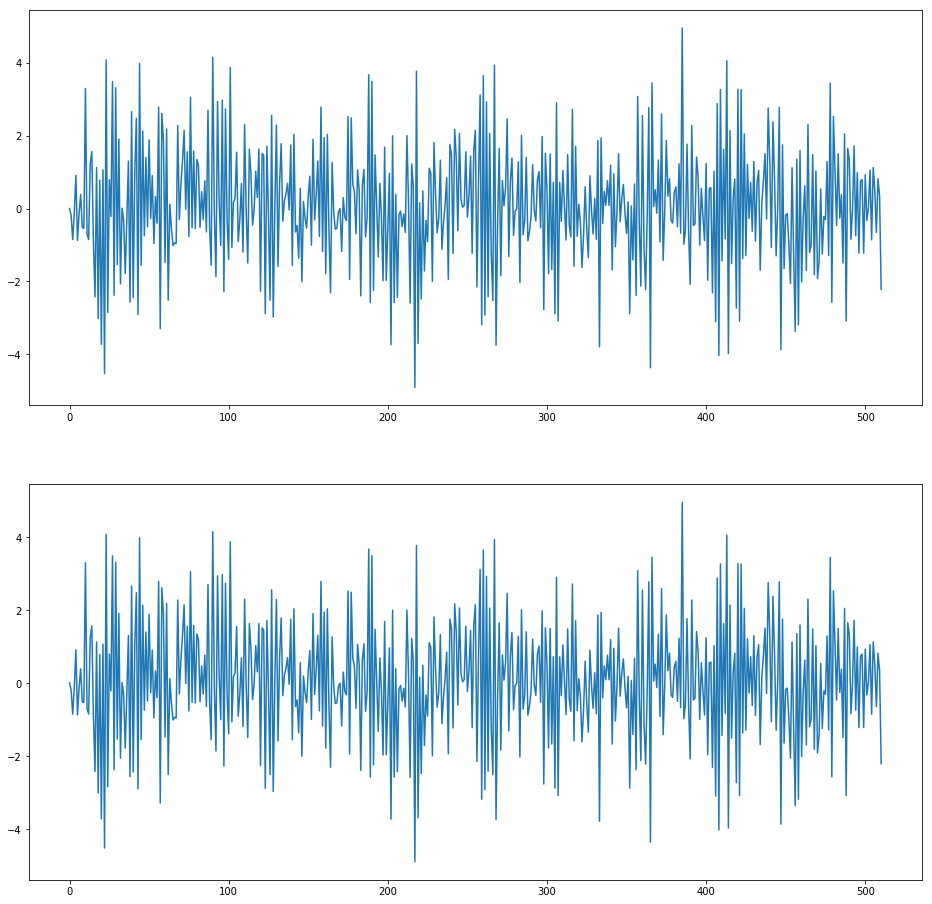

In [318]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

Ns = 512,1024,2048,4096

# def create_signal_with_noise(N, is_plot=True):
#     noise = np.random.normal(loc=0, scale=0.0731, size=N)
#     print(noise.dtype)
    
# #     a = np.asmatrix([0.975, -0.95, 1]).T
# #     u=[0, 0]
# #     for n in range(N):
# #         u_ = np.asmatrix([u[-1], u[-2], noise[n].item()]).T
# #         u_n = a.T.dot(u_)
# #         u.append(u_n.item())
        
# #     u = np.asmatrix(u).T
        
# #     if is_plot is True:
# #         fig = plt.figure(figsize=[10,10])
# #         ax = fig.add_subplot(111)
# #         ax.set_title("N={} signal".format(N))
# #         ax.plot(u)
        
#     return u


# def lms(u, mu, M = 2):
#     N = u.shape[0]
#     w = np.asmatrix(np.zeros((M, 2)))
#     d = u
#     mu=np.array(mu).reshape(-1,1)
    
#     e = np.array(len(mu) * [0]).reshape(-1,1)
    
#     for n in range(M):
#         u_ = np.array([u[0].item()] + (M-n-1)*[0]).reshape(-1, 1)
#         e = np.array(len(mu) * [0]).reshape(-1,1)
        
    
#     for n in range(N) + 2:
#         w += mu.T.dot(np.multiply(u_, np.conj(e)))
#         u_ = np.array([u[n+1].item(), u[n].item()]).reshape(-1, 1)
#         d_ = w.H.dot(u_)
#         e = d[n] - d_
        
#     print(w)
        

    
# u_512 = create_signal_with_noise(512)
# print("512 singal var:", u_512.var())

# for N in Ns:
#     u = create_signal_with_noise(N, is_plot=False)
#     print("{} singal var:".format(N), u.var())
#     lms(u, [0.05, 0.005])

N = 512
trials = 100
a1 = 0.975
a2 = -0.95
a = [1, a1, a2]

sigma_v_2 = 0.0731
v = np.random.normal(loc=0, scale=np.sqrt(sigma_v_2), size=(N, 1, trials))

u = u0 = np.zeros((2, 1, trials))


u_expend = np.concatenate([u0, v], axis=0)

for i in range(N):
    _u = np.tensordot(np.array(a[1:3]).reshape(-1,1), u_expend[i:i+2,:,:], axes=[[0], [0]])+v[i,:,:]
    u = np.append(u, _u, axis=0)
    
u = u[2:]


mu = [0.05, 0.005]
mu = np.array(mu).reshape(-1,1)
omega = np.matrix(np.zeros((2,2)))
e = np.zeros((2,1))
d = np.zeros((2,1))


E = np.zeros((2, 1, N))
for m in range(trials):
    Error = np.zeros((2,1))
    for n in range(2, N):
        u_t = u[n:n-2:-1,:,m]
        
        omega = omega + np.multiply(mu, u[n:n-2:-1,:,m], e.conj())
        d = omega.T.dot(u[n:n-2:-1,:,m])
        e = u[n,:,m] - d
        Error = np.append(Error, e, axis=1)

fig = plt.figure(figsize=[16,16])
ax = fig.add_subplot(211)
ax.plot(Error[1,:].T)
ax = fig.add_subplot(212)
ax.plot(Error[0,:].T)

In [262]:
x = np.array(range(25)).reshape(5,5)
print(x)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [183]:
a = np.array([[0.]
 ,[0.]])

b = np.array([[0.]
 ,[0.]])

a * b

array([[0.],
       [0.]])

In [ ]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

